# Multi-Class Image Classification for Robust Outdoor Weather Recognition


**Authors**: [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Evangeline Ngunjiri](mailto:evangeline.ngunjiri@student.moringaschool.com), and [Ivy Ndunge](mailto:ivy.ndunge@student.moringaschool.com)

## 1.0) Project Overview

In the "Visual Weather Recognition with Deep Learning" project, the objective is to create a sophisticated Convolutional Neural Network (CNN) model capable of accurately classifying diverse weather conditions based on visual cues in images. By leveraging deep learning techniques, the project aims to develop a robust system that can distinguish between various weather phenomena, including sunny, rainy, cloudy, and sunrise scenes. The key components include the collection and exploration of a comprehensive dataset, data preprocessing with augmentation to enhance model generalization, and the design of a specialized CNN architecture. The model will be trained and evaluated, with a focus on metrics such as accuracy, precision, and recall. Visualization techniques will be employed to gain insights into the CNN's interpretation of different weather patterns, and considerations for potential deployment scenarios will be explored.

Technologies utilized in this project include Python as the primary programming language, TensorFlow for building and training the CNN and Matplotlib and Seaborn for visualization.

## 1.1) Business Problem


The business objective is to leverage the multiclass weather dataset to advance the development of image classification models capable of accurately recognizing and categorizing different weather conditions. By doing so, this project aims to enhance the capabilities of outdoor weather analysis, offering valuable insights for sectors ranging from transportation and agriculture to urban planning and disaster preparedness.

## 1.2) Objectives

The primary aim of this project is to develop an advanced Convolutional Neural Network (CNN) model for accurate and robust weather classification based on visual cues in images. Leveraging the power of deep learning, this project seeks to create a sophisticated system capable of distinguishing between various weather conditions, including sunny, rainy, cloudy, and sunrise scenes. The objective extends beyond mere image recognition to the creation of a model that exhibits high-level understanding of complex visual patterns associated with different weather phenomena.

* Achieve an accuracy of at least 90% in classifying outdoor weather images across various conditions.
* Develop a model that is robust to variations in lighting, camera angles, and weather intensity.
* Minimize computational resources required for model training and inference.

## 1.3) Metric of Success

* Accuracy: Percentage of correctly classified weather images.
* Precision and Recall: Measures of how well the model identifies specific weather classes.
* F1-Score: Harmonic mean of precision and recall, providing a balanced measure of model performance.
* Inference Speed: Time taken to classify a single image.
* Computational Cost: Resources required to train and run the model.
* A robust and accurate multi-class image classification model for outdoor weather recognition.
* Potential applications in various sectors such as agriculture, aviation, and disaster management.

## 1.4) Data Relevance and Validation

The data available is relevant for the intended analysis and predictions

## 2.0) Understanding the Data

Multi-Class Image Classification of Outdoor Weather Dataset Description:

Name: Multi-class Weather Dataset for Image Classification

Size: 91.2MB

Format: Images with corresponding class labels (rain, cloudy, sunrise, shine)

Classes: 4
* Rain
* Cloudy
* Sunrise
* Shine

The data for this project is obtained from the [Mendeley Data website](https://data.mendeley.com/datasets/4drtyfjtfy/1?ref=hackernoon.com).

## 2.1) Reading the Data

### 2.1.1) Installations

In [37]:
# installations
# %pip install opencv-python
# %pip install tensorflow
# %pip install tensorflow keras efficientnet
# %conda install -c conda-forge scikit-image
# %pip install pillow
# %pip install tqdm
# %pip install --upgrade numpy
# %pip install --upgrade scipy


### 2.1.2) Importing Relevant Libraries

In [1]:
# importing necessary libraries
import os, shutil
import inspect
import itertools
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import random
from collections import Counter
from tqdm import tqdm
from PIL import Image
from scipy import ndimage
from shutil import copyfile
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.multiclass import unique_labels
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import L2, L1, L1L2
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
np.random.seed(123)

%matplotlib inline

c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:513: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### 2.1.3) Reading the Data

In [2]:
# reading the data

# path to the dataset
dataset_path = './data/dataset2/'

# List of supported weather classes based on file names
weather_classes = ['cloudy', 'rain', 'shine', 'sunrise']

# Dictionary to map weather class names to numerical labels
label_map = {weather_class: idx for idx, weather_class in enumerate(weather_classes)}

images_list = []
labels_list = []

filepaths = []
word_labels = []

# Function to extract class label from filename
def extract_label(filename):
    for weather_class in weather_classes:
        if weather_class in filename:
            return label_map[weather_class]
    return None

# Loop through each image file in the dataset directory
for img_file in tqdm(os.listdir(dataset_path), desc='Processing images'):
    img_path = os.path.join(dataset_path, img_file)
    
    try:
        # Open image using PIL
        img = Image.open(img_path)
        
        # Convert image to numpy array
        img = np.array(img)
        
        # Extract class label from the filename
        label = extract_label(img_file)
        word_label = [key for key, value in label_map.items() if value == label][0]
        if label is not None:
            # Append the image and its label to the lists
            images_list.append(img)
            labels_list.append(label)
            filepaths.append(img_path)
            word_labels.append(word_label)

    except Exception as e:
        print(f"Error processing image '{img_file}': {e}")

# Convert lists to numpy arrays
images = np.array(images_list)
labels = np.array(labels_list)
data = {'filepaths': filepaths, 'word_labels': word_labels}
df = pd.DataFrame(data)

print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")
df

Processing images: 100%|██████████| 1125/1125 [00:13<00:00, 84.81it/s] 

Total images: 1125
Total labels: 1125


filepaths word_labels
0       ./data/dataset2/cloudy1.jpg      cloudy
1      ./data/dataset2/cloudy10.jpg      cloudy
2     ./data/dataset2/cloudy100.jpg      cloudy
3     ./data/dataset2/cloudy101.jpg      cloudy
4     ./data/dataset2/cloudy102.jpg      cloudy
...                             ...         ...
1120  ./data/dataset2/sunrise95.jpg     sunrise
1121  ./data/dataset2/sunrise96.jpg     sunrise
1122  ./data/dataset2/sunrise97.jpg     sunrise
1123  ./data/dataset2/sunrise98.jpg     sunrise
1124  ./data/dataset2/sunrise99.jpg     sunrise

[1125 rows x 2 columns]

## 2.2) EDA before Preprocessing

### 2.2.1) Image preview

We will inspect 20 random images from the dataset

<ipython-input-3-e735c06e442a>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5, num_samples/5, i + 1)


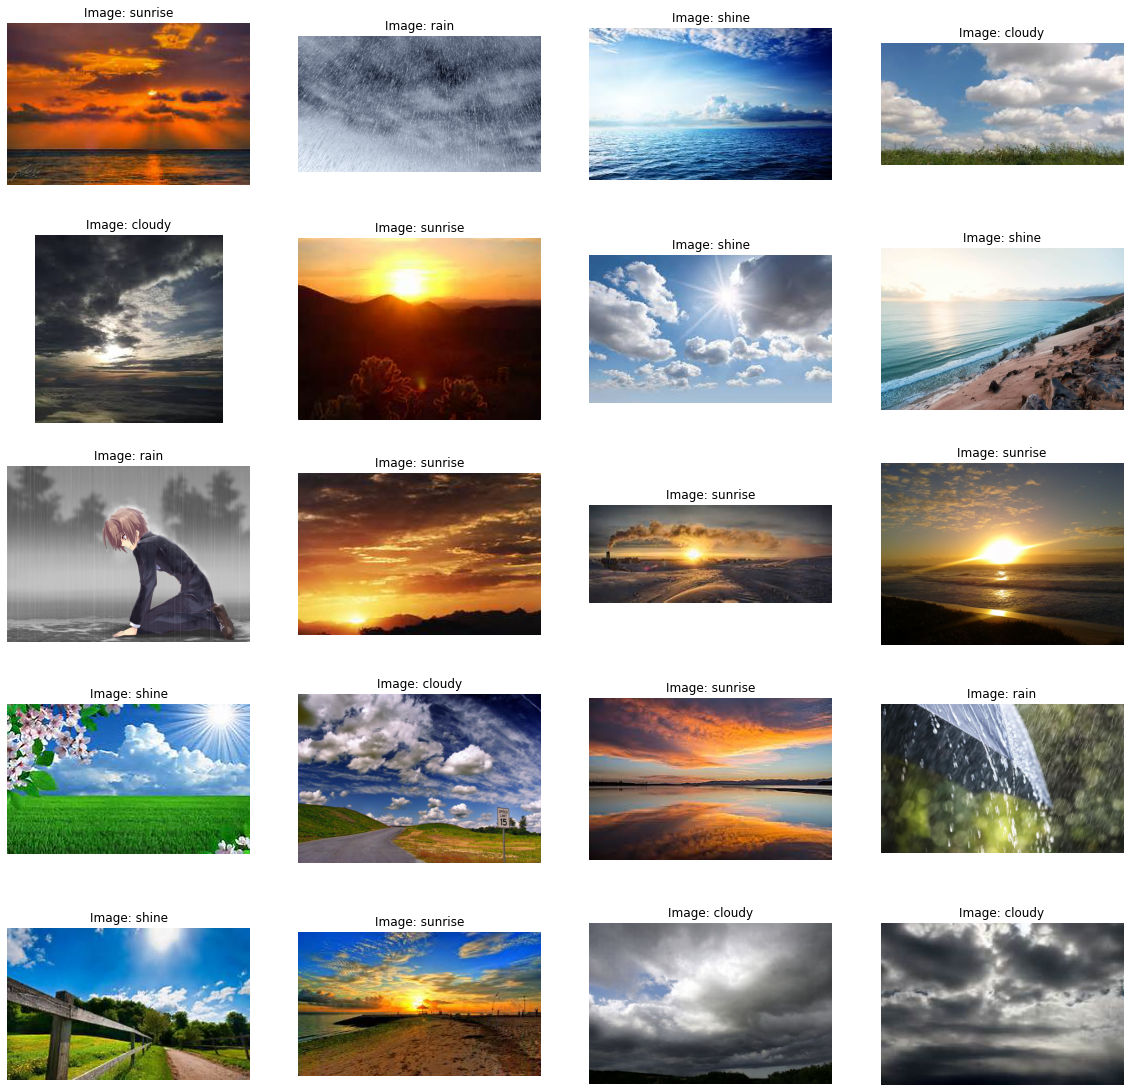

In [3]:
# previewing random images

def visualize_random_images(num_samples=20):
    plt.figure(figsize=(20, 20))
    for i in range(num_samples):
        random_idx = random.randint(0, len(images) - 1) 
        random_image = images[random_idx]
        
        filename = [key for key, value in label_map.items() if value == labels[random_idx]][0]
        
        # Displaying the image
        plt.subplot(5, num_samples/5, i + 1)
        plt.imshow(random_image)
        plt.title(f"Image: {filename}")
        plt.axis("off")
    plt.savefig('./images/images_preview.svg', format='svg', transparent=True)
    plt.show()

visualize_random_images()


### 2.2.2) Weather Class Distribution

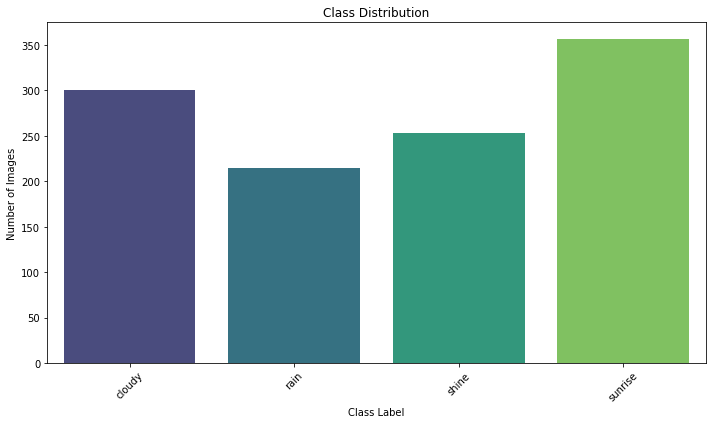

Counter({0: 300, 1: 215, 2: 253, 3: 357})

In [4]:
# class Distribution Visualization

# Get class titles from the label_map
class_titles = [key for key in label_map.keys()]

# Calculate class distribution using Counter
class_distribution = Counter(labels)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_titles, y=list(class_distribution.values()), palette='viridis')
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./images/weather_class_distribution.svg', format='svg', transparent=True)
plt.show()
class_distribution

Observation: The weather classes are relatively evenly distributed. There are 300 images showing cloudy weather, 215 images showing rainy weather, 253 images showing shinny weather, and 357 images showing sunrise. This shows class imbalance.

### 2.2.3) Image Size Distribution

Processing images: 100%|██████████| 1125/1125 [00:00<00:00, 3252.37it/s]


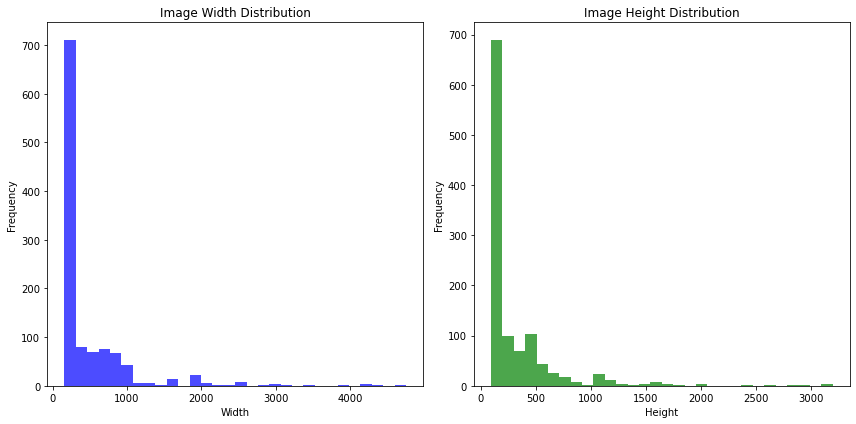

In [5]:
# image size distribution
image_sizes = []
for img_file in tqdm(os.listdir(dataset_path), desc='Processing images'):
    img_path = os.path.join(dataset_path, img_file)
    img = Image.open(img_path)
    width, height = img.size
    image_sizes.append((width, height))

widths, heights = zip(*image_sizes)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('./images/image_size_distribution.svg', format='svg', transparent=True)
plt.show()

Observation: The images have varying sizes (height and width).

### 2.2.4) Image Pixel Distribution

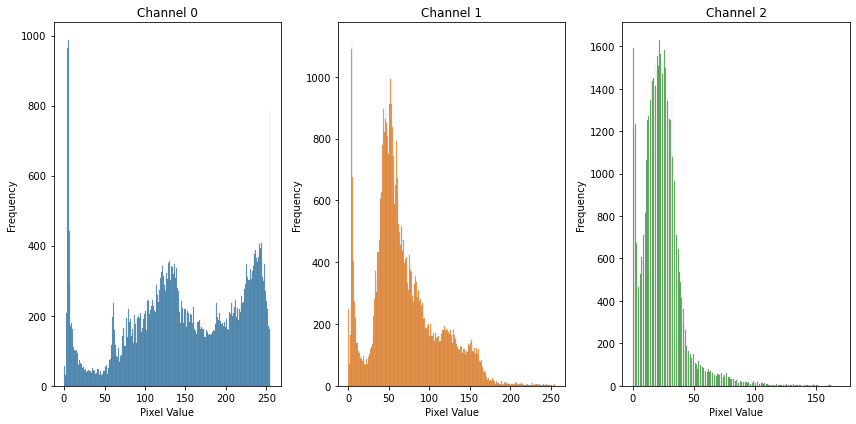

In [6]:
# Convert image to a NumPy array
img_array = np.array(img)

# Display pixel value distributions
plt.figure(figsize=(12, 6))

# Plot histograms for each color channel
for i in range(img_array.shape[2]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(img_array[:, :, i].ravel(), bins=256, color=f'C{i}', alpha=0.7)
    plt.title(f'Channel {i}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('./images/image_pixel_distribution.svg', format='svg', transparent=True)
plt.show()

Observation: the RGB color distribution 

### 2.2.5) Label Mappings

In [7]:
# viewing label mappings
for key, value in label_map.items():
    print(f"{key} : {value}")

cloudy : 0
rain : 1
shine : 2
sunrise : 3


## 2.3) Data Preprocessing

### 2.3.1) Splitting the Data

In [8]:
# Setting the paths for the train, test, and validation directories
train_imgs = "./data/traindataset/"
test_imgs = "./data/testdataset/"
val_imgs = "./data/valdataset/"

# Defining split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15


# Creating directories
os.makedirs(train_imgs, exist_ok=True)
os.makedirs(test_imgs, exist_ok=True)
os.makedirs(val_imgs, exist_ok=True)

# Splitting the DataFrame into train, validation, and test sets
train_df, df_2 = train_test_split(df, train_size=train_ratio, random_state=42, shuffle=True)
val_df, test_df = train_test_split(df_2, test_size=val_ratio/(test_ratio+val_ratio), random_state=42, shuffle=True)

# Function to copy/move files to subdirectories based on weather classes
def organize_images_by_weather_classes(file_list, source_dir, destination_dir, classes):
    for weather_class in classes:
        os.makedirs(os.path.join(destination_dir, weather_class), exist_ok=True)

    for filepath, label in zip(file_list['filepaths'], file_list['word_labels']):
        filename = os.path.basename(filepath)
        weather_class = label.lower()
        if weather_class in classes:
            destination_path = os.path.join(destination_dir, weather_class, filename)
            shutil.copy(filepath, destination_path)

# Copying and organizing images to train directory by weather classes
organize_images_by_weather_classes(train_df, dataset_path, train_imgs, weather_classes)

# Copying and organizing images to validation directory by weather classes
organize_images_by_weather_classes(val_df, dataset_path, val_imgs, weather_classes)

# Copying and organizing images to test directory by weather classes
organize_images_by_weather_classes(test_df, dataset_path, test_imgs, weather_classes)

# Function to count number of images in each subdirectory
def count_images_in_subdirectories(parent_directory, classes):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']

    # Dictionary to store image counts for each class
    image_counts = {cls: 0 for cls in classes}

    # Iterating through each class directory and counting images
    for cls in classes:
        directory_path = os.path.join(parent_directory, cls)
        if os.path.exists(directory_path):
            for filename in os.listdir(directory_path):
                if any(filename.lower().endswith(ext) for ext in image_extensions):
                    image_counts[cls] += 1

    return image_counts

# Getting the count of images in each subdirectory
num_train_images = count_images_in_subdirectories(train_imgs, weather_classes)
num_val_images = count_images_in_subdirectories(val_imgs, weather_classes)
num_test_images = count_images_in_subdirectories(test_imgs, weather_classes)

# Displaying number of images in each class within directories
for cls in weather_classes:
    print(f"There are {num_train_images[cls]} {cls} images in the training set")
    print(f"There are {num_val_images[cls]} {cls} images in the validation set")
    print(f"There are {num_test_images[cls]} {cls} images in the test set")

There are 209 cloudy images in the training set
There are 45 cloudy images in the validation set
There are 46 cloudy images in the test set
There are 143 rain images in the training set
There are 33 rain images in the validation set
There are 39 rain images in the test set
There are 178 shine images in the training set
There are 37 shine images in the validation set
There are 38 shine images in the test set
There are 257 sunrise images in the training set
There are 54 sunrise images in the validation set
There are 46 sunrise images in the test set


### 2.3.1) Image Generation

### 2.3.2) Image Data Augmentation

In [34]:
# # Data augmentation and flow_from_directory

# # Define constants
# target_width = 224
# target_height = 224
# img_size = (target_width, target_height)
# channels = 3
# batch_size = 32
# img_shape = (target_width, target_height, channels)

# # Function for image preprocessing using cv2
# def preprocess_image(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
#     img = cv2.resize(img, img_size)
#     img = img.astype('float32') / 255.0  # Normalizing pixel values between 0 and 1
#     return img

# # Creating ImageDataGenerator instances
# train_data_gen = ImageDataGenerator(
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     zoom_range=0.2,
#     fill_mode='nearest',
#     preprocessing_function=preprocess_image
# )

# val_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)
# test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

# # Flowing data from directories
# train_gen = train_data_gen.flow_from_directory(
#     train_imgs,
#     target_size=img_size,
#     class_mode='categorical',
#     shuffle=True,
#     batch_size=batch_size
# )

# valid_gen = val_data_gen.flow_from_directory(
#     val_imgs,
#     target_size=img_size,
#     class_mode='categorical',
#     shuffle=True,
#     batch_size=batch_size
# )

# test_gen = test_data_gen.flow_from_directory(
#     test_imgs,
#     target_size=img_size,
#     class_mode='categorical',
#     shuffle=True,
#     batch_size=batch_size
# )

Found 787 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 169 images belonging to 4 classes.


In [38]:
# Data augmentation and flow_from_directory

# Defining constants
target_width = 224
target_height = 224
img_size = (target_width, target_height)
channels = 3
batch_size = 32
img_shape = (target_width, target_height, channels)

# Function for image preprocessing using cv2
def preprocess_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA)
    img = img.astype('float32') / 255.0  # Normalizing pixel values between 0 and 1
    return img

# Creating ImageDataGenerator instances
train_data_gen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    rotation_range=20,  
    shear_range=0.2,  
    horizontal_flip=True, 
    brightness_range=[0.8, 1.2],
    preprocessing_function=preprocess_image
)

val_data_gen = ImageDataGenerator(preprocessing_function=preprocess_image)
test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_image)

# Flowing data from directories
train_gen = train_data_gen.flow_from_directory(
    train_imgs,
    target_size=img_size,
    class_mode='categorical',
    shuffle=True,
    batch_size=batch_size
)

valid_gen = val_data_gen.flow_from_directory(
    val_imgs,
    target_size=img_size,
    class_mode='categorical',
    shuffle=True,
    batch_size=batch_size
)

test_gen = test_data_gen.flow_from_directory(
    test_imgs,
    target_size=img_size,
    class_mode='categorical',
    shuffle=True,
    batch_size=batch_size
)

Found 787 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 169 images belonging to 4 classes.


In [13]:
# Class weights to solve for class imbalance
class_count = len(list(train_gen.class_indices.keys()))

class_weights = compute_class_weight('balanced', np.unique(train_gen.classes), train_gen.classes)
class_weights_dict = dict(enumerate(class_weights))

c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

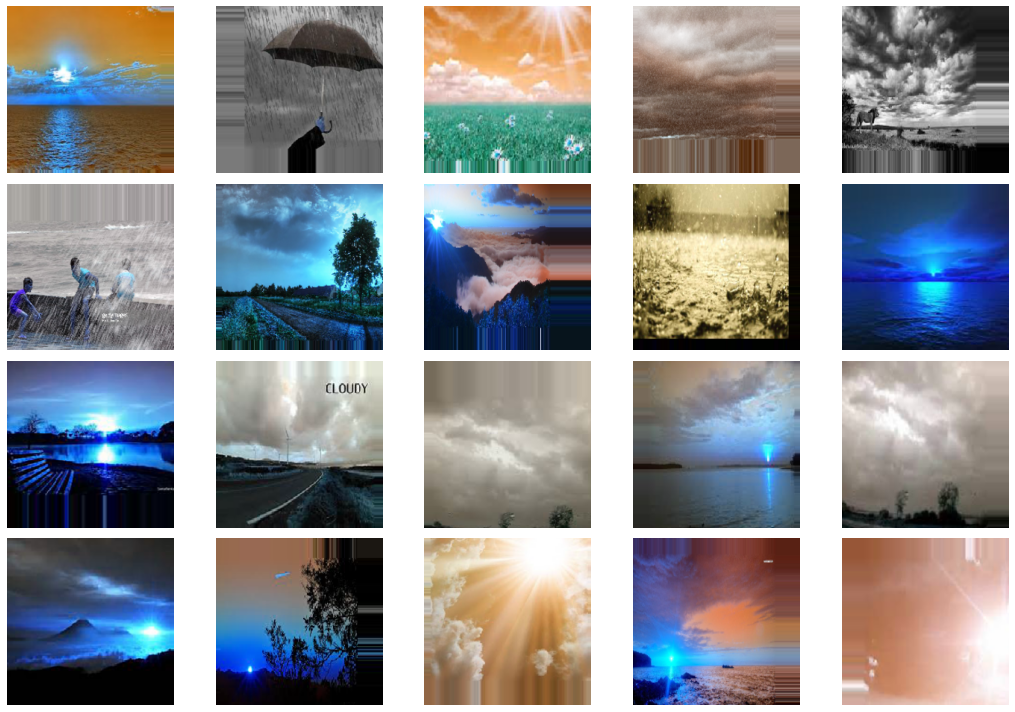

In [14]:
# Getting 20 sample augmented images from train_gen
sample_images = []
num_samples = 20

for i in range(num_samples):
    augmented_image, _ = train_gen.next()  
    sample_images.append(augmented_image[0])

# Displaying the sample images
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(4, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')

plt.tight_layout()
plt.savefig('./images/sample_augmented_images.svg', format='svg', transparent=True)
plt.show()


## 2.4) Building Model

In [15]:
# Creating an ANN model
ann_model = Sequential([
    Flatten(input_shape=(target_width, target_height, 3)), 
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(weather_classes), activation='softmax')
])

# Compiling the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = ann_model.fit(train_gen, epochs=20, validation_data=valid_gen)

Epoch 1/20
25/25 [==============================] - 23s 914ms/step - loss: 38.8184 - accuracy: 0.3888 - val_loss: 3.2032 - val_accuracy: 0.2071
Epoch 2/20
25/25 [==============================] - 22s 880ms/step - loss: 1.4586 - accuracy: 0.4600 - val_loss: 1.8671 - val_accuracy: 0.1361
Epoch 3/20
25/25 [==============================] - 21s 821ms/step - loss: 1.4587 - accuracy: 0.4689 - val_loss: 2.6595 - val_accuracy: 0.2249
Epoch 4/20
25/25 [==============================] - 21s 846ms/step - loss: 1.5178 - accuracy: 0.4498 - val_loss: 1.4151 - val_accuracy: 0.2663
Epoch 5/20
25/25 [==============================] - 22s 880ms/step - loss: 1.1510 - accuracy: 0.4498 - val_loss: 1.6752 - val_accuracy: 0.2426
Epoch 6/20
25/25 [==============================] - 21s 833ms/step - loss: 1.1516 - accuracy: 0.4740 - val_loss: 1.9414 - val_accuracy: 0.1716
Epoch 7/20
25/25 [==============================] - 20s 789ms/step - loss: 1.0935 - accuracy: 0.5006 - val_loss: 2.3862 - val_accuracy: 0.254

In [16]:
def evaluate_and_display_summary(model, test_data):
    # Evaluating the model on the test data
    test_loss, test_accuracy = model.evaluate(test_data)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    # Displaying the model summary
    model.summary()

In [17]:
# Evaluating the model on the test data and displaying model summary

evaluate_and_display_summary(ann_model, test_gen)

6/6 [==============================] - 1s 168ms/step - loss: 5.0231 - accuracy: 0.2012
Test Accuracy: 20.12%
Test Loss: 5.0231
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               19267712  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 19,268,228
Trainable params: 19,268,228
Non-trainable params: 0
_________________________________________________________________


In [18]:
# A function to plot history metrics

def plot_history_metrics(history):
    # Extracting metrics from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plotting accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plotting loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

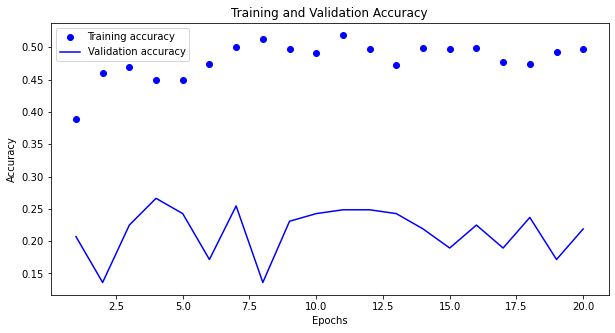

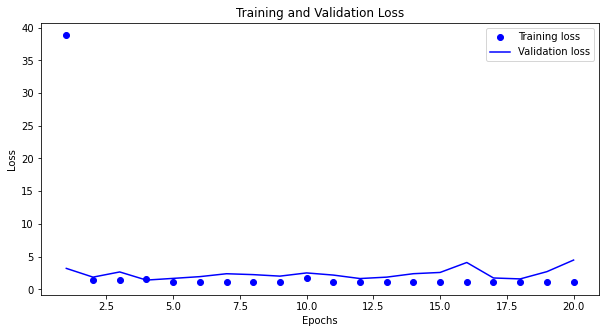

In [19]:
# Plotting history metrics
plot_history_metrics(history)

In [20]:
# A function to plot 20 sample images comparing their predicted labels to actual labels

def generate_and_visualize_predictions(model, test_gen, label_map, target_width, target_height, num_samples=20):

    # Retrieving model name for naming svg files
    frame = inspect.currentframe().f_back
    local_vars = frame.f_locals
    model_name = [name for name, obj in local_vars.items() if obj is model][0] if model is not None else 'model'

    # Initializing samples lists
    sample_images = []
    sample_labels = []
    predicted_labels = []

    # Predicting on sample images
    for i in range(num_samples):
        img_batch, label_batch = next(test_gen)  # Loading a batch from the generator

        # Choosing the first image from the batch for prediction
        img = img_batch[0]
        label = label_batch[0]

        # Resizing images to match the input shape expected by the model
        img = image.array_to_img(img)  # Converting to PIL Image
        img = img.resize((target_width, target_height))  # Resizing to target width and height
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)  # Adding batch dimension

        prediction = model.predict(img)

        # Converting numerical labels to label names using label_map
        true_label = np.argmax(label)
        predicted_label = np.argmax(prediction)
        true_label_name = [key for key, value in label_map.items() if value == true_label][0]
        predicted_label_name = [key for key, value in label_map.items() if value == predicted_label][0]

        sample_images.append(np.squeeze(img))  # Removing the batch dimension
        sample_labels.append(true_label_name)
        predicted_labels.append(predicted_label_name)

    # Plotting the sample images with their actual and predicted labels
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(4, 5, i + 1)
        plt.imshow(sample_images[i].astype(np.uint8))
        plt.title(f"Actual: {sample_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(f'./images/{model_name}_predictions.svg', format='svg', transparent=True)
    plt.show()

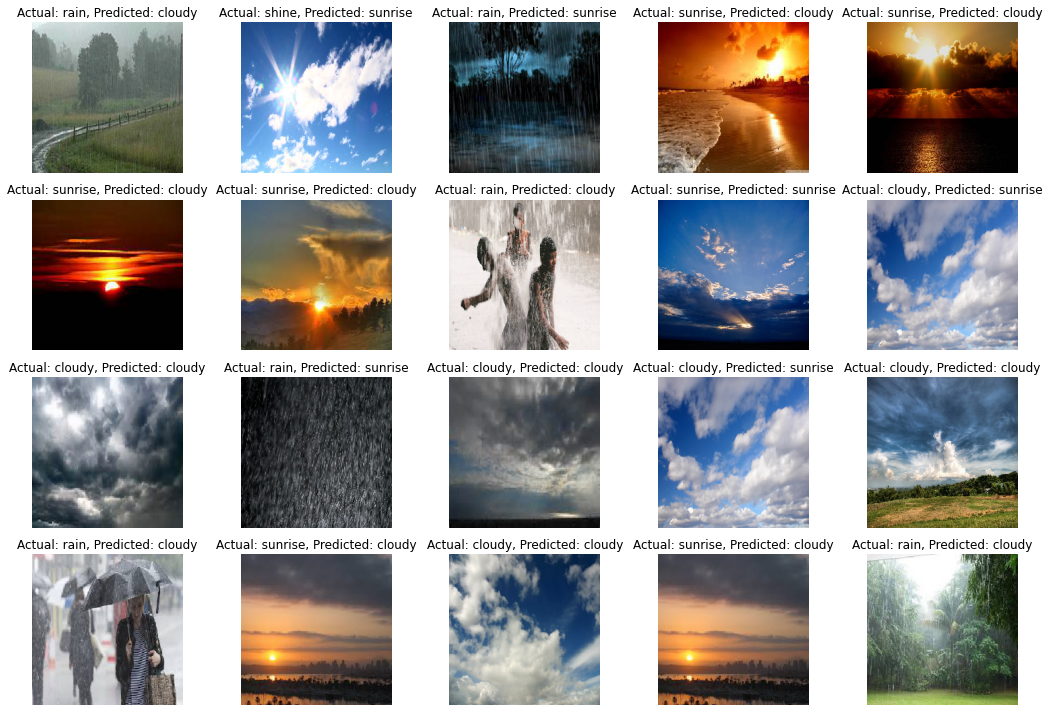

In [21]:
# Generating predictions for 20 samples and visualizing

generate_and_visualize_predictions(ann_model, test_gen, label_map, target_width, target_height)

In [22]:
# A function to plot confusion matix and classification report

def generate_confusion_matrix_and_report(model, test_gen, weather_classes):
    # Making predictions on the test data using the trained model
    y_pred = model.predict(test_gen)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Getting the true classes from the test data
    true_classes = test_gen.classes

    # Calculating confusion matrix
    conf_matrix = confusion_matrix(true_classes, y_pred_classes)

    # Getting the class labels
    class_labels = weather_classes

    # Plotting the confusion matrix
    plt.figure(figsize=((10, 10)))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Generating classification report
    class_report = classification_report(true_classes, y_pred_classes)

    # Print classification report
    print("Classification Report:")
    print(class_report)


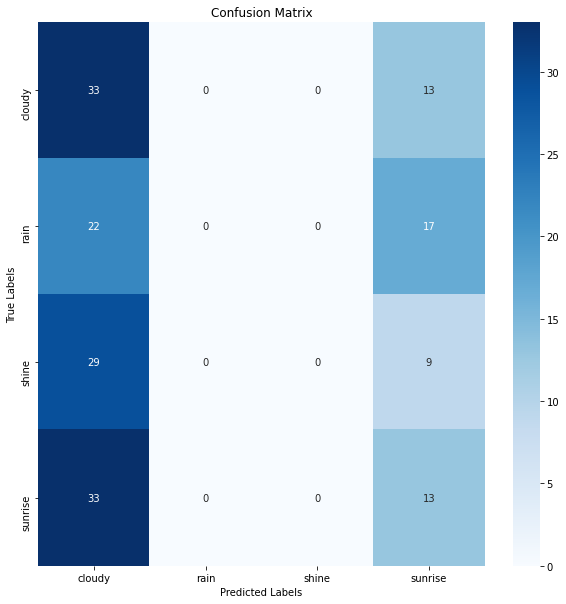

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.72      0.40        46
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        38
           3       0.25      0.28      0.27        46

    accuracy                           0.27       169
   macro avg       0.13      0.25      0.17       169
weighted avg       0.14      0.27      0.18       169



c:\Users\Dominc\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Generating confusion matrix and classification report and visualizing

generate_confusion_matrix_and_report(ann_model, test_gen, weather_classes)

In [24]:
# Creating a CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_width, target_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'), 
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(len(weather_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Training the model with callbacks
history = model.fit(train_gen, epochs=50, validation_data=valid_gen,
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
25/25 [==============================] - 60s 2s/step - loss: 1.3542 - accuracy: 0.5337 - val_loss: 3.9484 - val_accuracy: 0.2071
Epoch 2/50
25/25 [==============================] - 58s 2s/step - loss: 0.9416 - accuracy: 0.6633 - val_loss: 4.6837 - val_accuracy: 0.2485
Epoch 3/50
25/25 [==============================] - 57s 2s/step - loss: 0.8018 - accuracy: 0.7548 - val_loss: 2.8968 - val_accuracy: 0.3136
Epoch 4/50
25/25 [==============================] - 58s 2s/step - loss: 0.6925 - accuracy: 0.7903 - val_loss: 4.6336 - val_accuracy: 0.2781
Epoch 5/50
25/25 [==============================] - 60s 2s/step - loss: 0.6682 - accuracy: 0.8272 - val_loss: 2.5335 - val_accuracy: 0.4083
Epoch 6/50
25/25 [==============================] - 61s 2s/step - loss: 0.5194 - accuracy: 0.8590 - val_loss: 3.7818 - val_accuracy: 0.2959
Epoch 7/50
25/25 [==============================] - 59s 2s/step - loss: 0.4968 - accuracy: 0.8653 - val_loss: 3.1429 - val_accuracy: 0.3787
Epoch 8/50
25/25 [==

In [25]:
# Evaluating the model on the test data and displaying model summary

evaluate_and_display_summary(model, test_gen)

6/6 [==============================] - 2s 372ms/step - loss: 2.4808 - accuracy: 0.4024
Test Accuracy: 40.24%
Test Loss: 2.4808
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0   

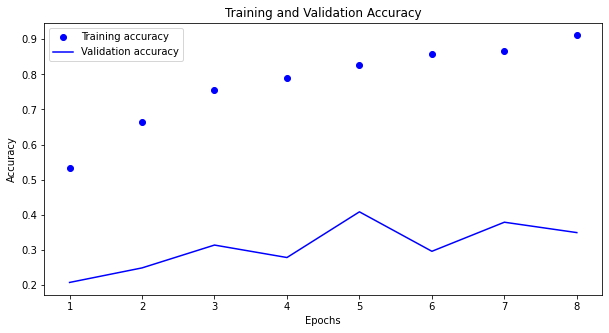

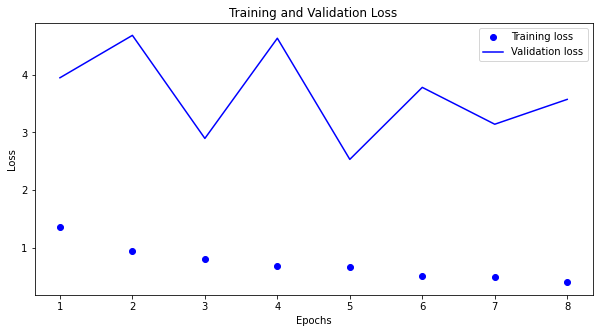

In [26]:
# Plotting history
plot_history_metrics(history)

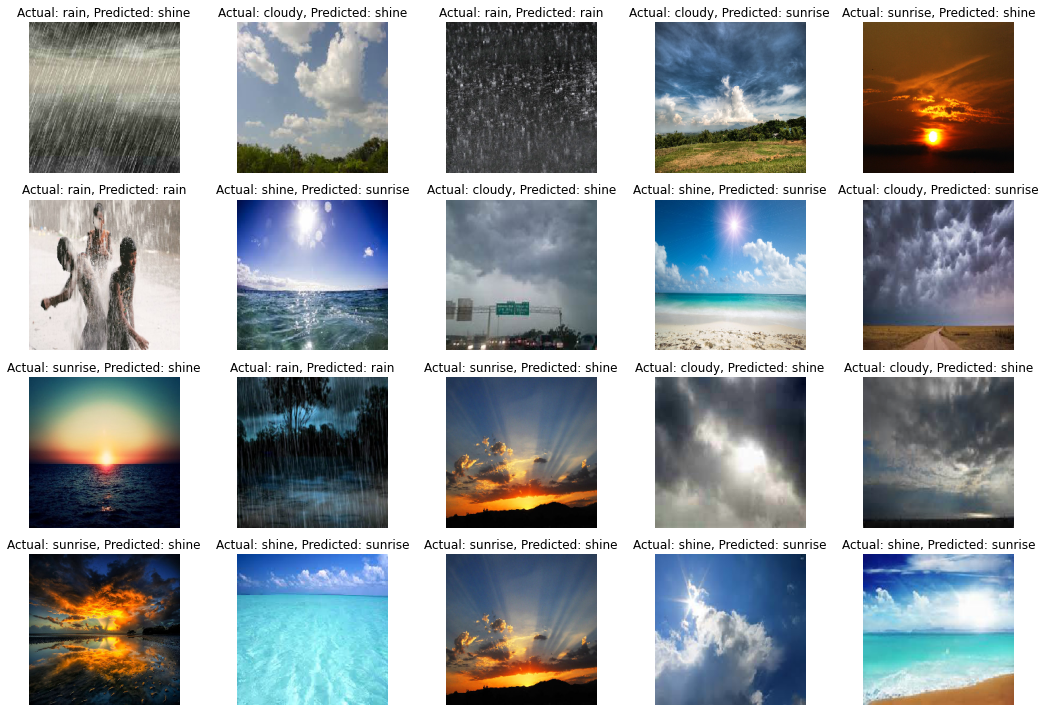

In [27]:
# Generating predictions for 20 samples and visualizing

generate_and_visualize_predictions(model, test_gen, label_map, target_width, target_height)

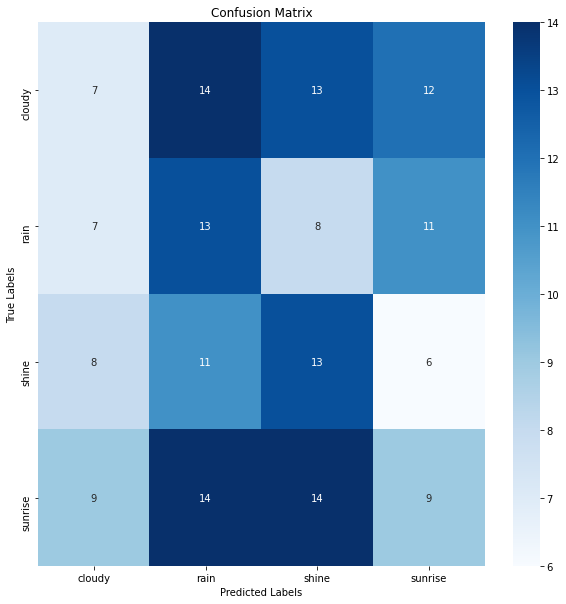

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.15      0.18        46
           1       0.25      0.33      0.29        39
           2       0.27      0.34      0.30        38
           3       0.24      0.20      0.21        46

    accuracy                           0.25       169
   macro avg       0.25      0.26      0.25       169
weighted avg       0.24      0.25      0.24       169



In [28]:
# Generating confusion matrix and classification report and visualizing

generate_confusion_matrix_and_report(model, test_gen, weather_classes)

In [29]:
# Defining model architecture
model2 = Sequential([
   Conv2D(32, (3, 3), activation='relu', input_shape=(target_width, target_height, 3)),
   MaxPooling2D((2, 2)),
   Conv2D(64, (3, 3), activation='relu'),
   MaxPooling2D((2, 2)),
   Conv2D(128, (3, 3), activation='relu'),
   MaxPooling2D((2, 2)),
   Flatten(),
   Dense(512, activation='relu'),
   Dropout(0.5),
   Dense(len(weather_classes), activation='softmax')
])

# Compiling the model with class weights
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with class weights for each batch
history = model2.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=20,
    validation_data=valid_gen,
    validation_steps=valid_gen.samples // batch_size,
    class_weight=class_weights_dict
)

Epoch 1/20
24/24 [==============================] - 55s 2s/step - loss: 1.3366 - accuracy: 0.5748 - val_loss: 3.8946 - val_accuracy: 0.1937
Epoch 2/20
24/24 [==============================] - 53s 2s/step - loss: 0.6503 - accuracy: 0.7563 - val_loss: 4.0374 - val_accuracy: 0.2937
Epoch 3/20
24/24 [==============================] - 53s 2s/step - loss: 0.5198 - accuracy: 0.8225 - val_loss: 2.5221 - val_accuracy: 0.2937
Epoch 4/20
24/24 [==============================] - 55s 2s/step - loss: 0.4252 - accuracy: 0.8570 - val_loss: 3.5795 - val_accuracy: 0.3562
Epoch 5/20
24/24 [==============================] - 54s 2s/step - loss: 0.4255 - accuracy: 0.8583 - val_loss: 2.7075 - val_accuracy: 0.2937
Epoch 6/20
24/24 [==============================] - 54s 2s/step - loss: 0.3805 - accuracy: 0.8702 - val_loss: 3.1007 - val_accuracy: 0.3375
Epoch 7/20
24/24 [==============================] - 54s 2s/step - loss: 0.3527 - accuracy: 0.8808 - val_loss: 2.4455 - val_accuracy: 0.4250
Epoch 8/20
24/24 [==

In [30]:
# Evaluating the model on the test data and displaying model summary

evaluate_and_display_summary(model2, test_gen)

6/6 [==============================] - 2s 346ms/step - loss: 7.6129 - accuracy: 0.3195
Test Accuracy: 31.95%
Test Loss: 7.6129
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0   

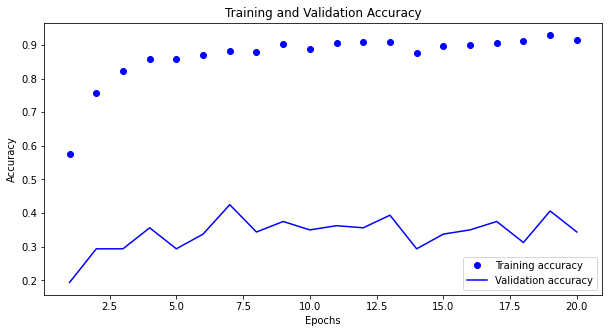

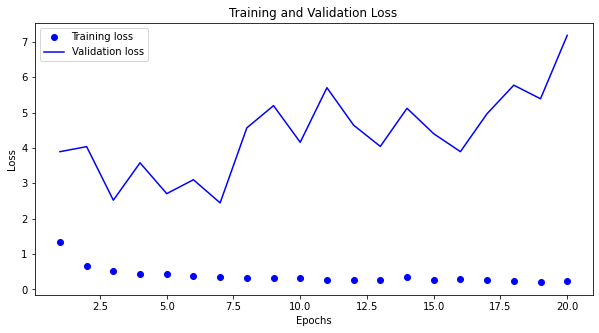

In [31]:
# Plotting history
plot_history_metrics(history)

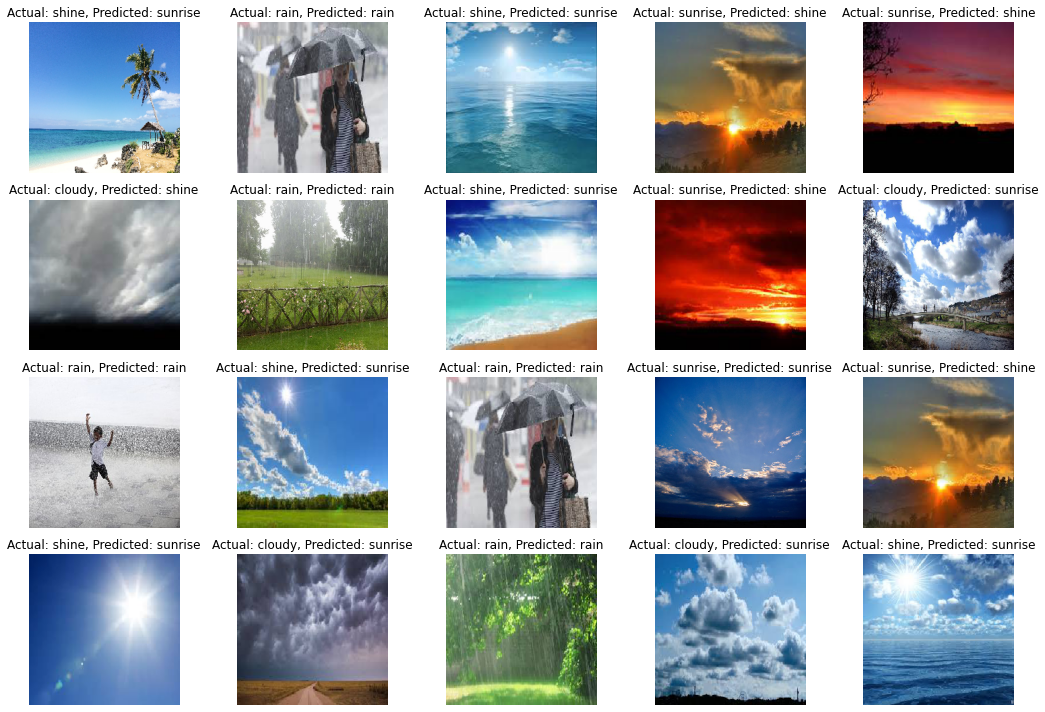

In [32]:
# Generating predictions for 20 samples and visualizing

generate_and_visualize_predictions(model2, test_gen, label_map, target_width, target_height)

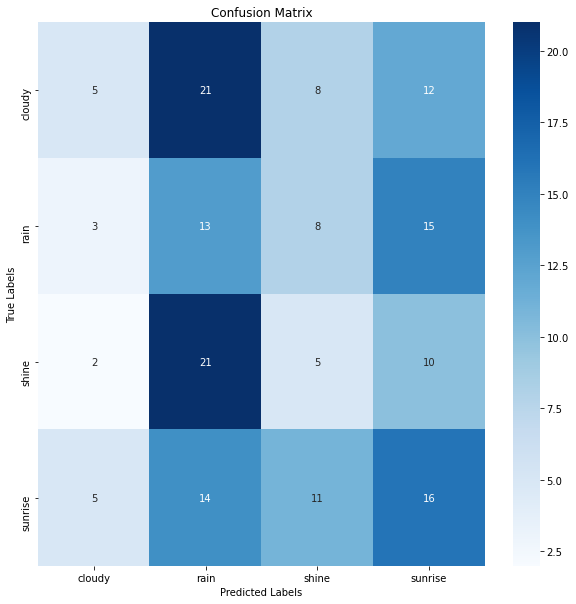

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.11      0.16        46
           1       0.19      0.33      0.24        39
           2       0.16      0.13      0.14        38
           3       0.30      0.35      0.32        46

    accuracy                           0.23       169
   macro avg       0.24      0.23      0.22       169
weighted avg       0.25      0.23      0.22       169



In [33]:
# Generating confusion matrix and classification report and visualizing

generate_confusion_matrix_and_report(model2, test_gen, weather_classes)

In [97]:

# Creating pre-trained model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_shape, include_top=False, weights='imagenet', pooling='max'
)

# Defining model architecture
model3 = Sequential([
    base_model,
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(class_count, activation='softmax')
])

# Compiling the model
model3.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Defining callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Training the model
epochs = 50

history = model3.fit(
    x=train_gen,
    epochs=epochs,
    verbose=1,
    validation_data=valid_gen,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
25/25 [==============================] - 141s 6s/step - loss: 4.9820 - accuracy: 0.3698 - val_loss: 1.6944 - val_accuracy: 0.5325
Epoch 2/50
25/25 [==============================] - 133s 5s/step - loss: 2.3677 - accuracy: 0.5845 - val_loss: 1.9445 - val_accuracy: 0.5680
Epoch 3/50
25/25 [==============================] - 132s 5s/step - loss: 1.4163 - accuracy: 0.7332 - val_loss: 1.6305 - val_accuracy: 0.6627
Epoch 4/50
25/25 [==============================] - 132s 5s/step - loss: 1.0163 - accuracy: 0.7776 - val_loss: 1.5397 - val_accuracy: 0.7101
Epoch 5/50
25/25 [==============================] - 132s 5s/step - loss: 0.7836 - accuracy: 0.8221 - val_loss: 1.1290 - val_accuracy: 0.7692
Epoch 6/50
25/25 [==============================] - 124s 5s/step - loss: 0.4759 - accuracy: 0.8755 - val_loss: 1.0386 - val_accuracy: 0.7751
Epoch 7/50
25/25 [==============================] - 120s 5s/step - loss: 0.3833 - accuracy: 0.9034 - val_loss: 0.9146 - val_accuracy: 0.7929
Epoch 8/50
25

In [98]:
# Evaluating the model on the test data and displaying model summary

evaluate_and_display_summary(model3, test_gen)

6/6 [==============================] - 3s 564ms/step - loss: 0.1519 - accuracy: 0.9527
Test Accuracy: 95.27%
Test Loss: 0.1519
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               327936    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 1028      
Total params: 2,586,948
Trainable params: 2,552,836
Non-trainable params: 34,112
____________________________________________

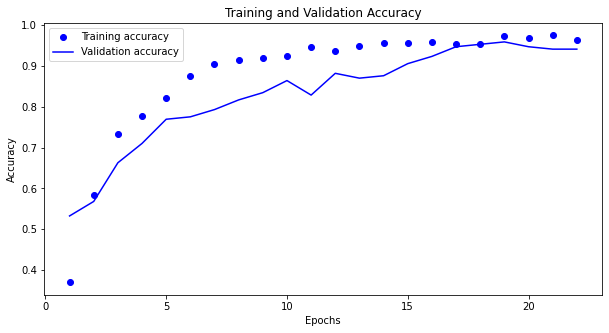

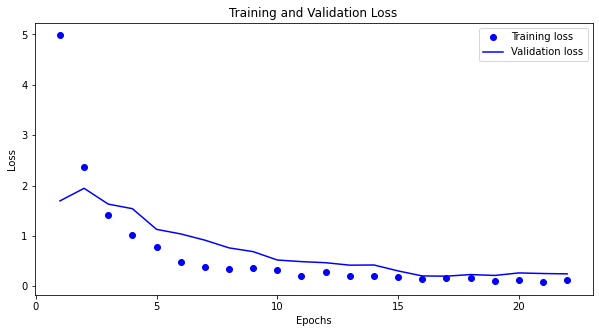

In [99]:
# Plotting history metrics
plot_history_metrics(history)

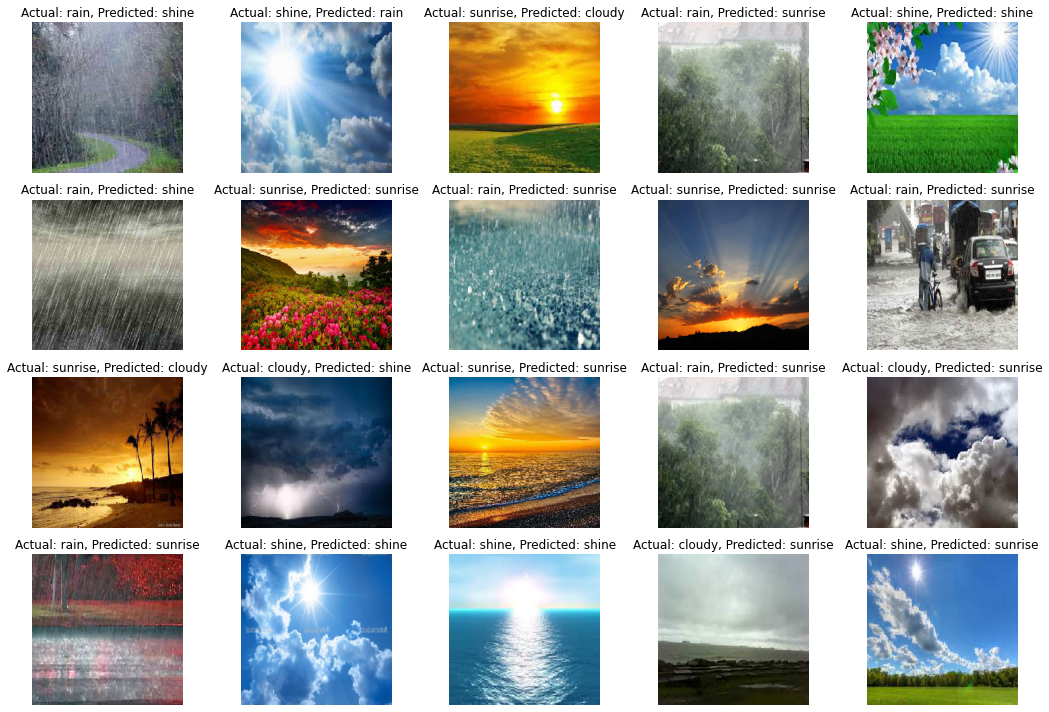

In [100]:
# Generating predictions for 20 samples and visualizing

generate_and_visualize_predictions(model3, test_gen, label_map, target_width, target_height)

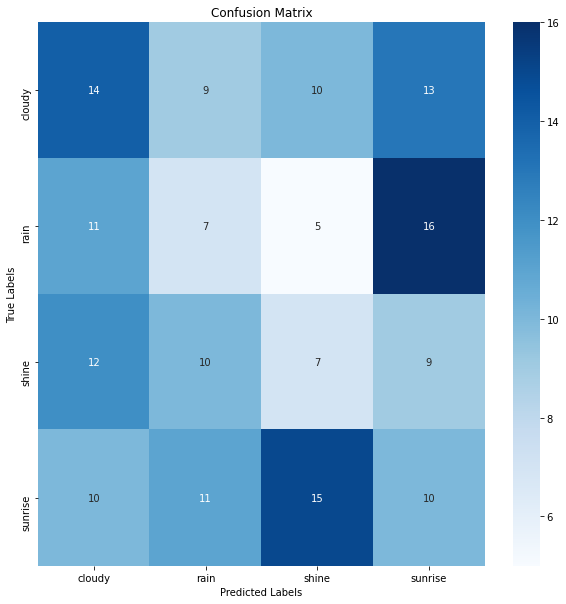

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.30      0.30        46
           1       0.19      0.18      0.18        39
           2       0.19      0.18      0.19        38
           3       0.21      0.22      0.21        46

    accuracy                           0.22       169
   macro avg       0.22      0.22      0.22       169
weighted avg       0.22      0.22      0.22       169



In [101]:
# Generating confusion matrix and classification report and visualizing

generate_confusion_matrix_and_report(model3, test_gen, weather_classes)

In [37]:
model5 = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(target_width, target_height, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
       
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=L2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
       
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=L2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
       
        Flatten(),
       
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=len(weather_classes), activation='softmax')
    ])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
optimizer = Adam(learning_rate=0.001)
model5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model5.fit(train_gen, epochs=50, validation_data=valid_gen,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50
25/25 - 165s - loss: 4.0886 - accuracy: 0.7014 - val_loss: 937.2513 - val_accuracy: 0.4734
Epoch 2/50
25/25 - 154s - loss: 3.9710 - accuracy: 0.7598 - val_loss: 1586.7076 - val_accuracy: 0.4556
Epoch 3/50
25/25 - 148s - loss: 2.8028 - accuracy: 0.7598 - val_loss: 1994.5287 - val_accuracy: 0.4438
Epoch 4/50
25/25 - 230s - loss: 2.0040 - accuracy: 0.7980 - val_loss: 3161.8860 - val_accuracy: 0.4675
Epoch 5/50
25/25 - 206s - loss: 1.3200 - accuracy: 0.7814 - val_loss: 3918.9290 - val_accuracy: 0.0888
Epoch 6/50
25/25 - 189s - loss: 1.1555 - accuracy: 0.8259 - val_loss: 2411.0325 - val_accuracy: 0.3609
Epoch 7/50
25/25 - 165s - loss: 1.3602 - accuracy: 0.8374 - val_loss: 3625.9014 - val_accuracy: 0.2249
Epoch 8/50
25/25 - 251s - loss: 0.8578 - accuracy: 0.8183 - val_loss: 3865.0781 - val_accuracy: 0.2367
Epoch 9/50
25/25 - 101s - loss: 0.7202 - accuracy: 0.8475 - val_loss: 3619.6589 - val_accuracy: 0.3195
Epoch 10/50
25/25 - 105s - loss: 0.8573 - accuracy: 0.8335 - val_loss: 410

KeyboardInterrupt: 

In [86]:
# Evaluating the model on the test data and displaying model summary

evaluate_and_display_summary(model5, test_gen)

6/6 [==============================] - 3s 495ms/step - loss: 0.3920 - accuracy: 0.9172
Test Accuracy: 91.72%
Test Loss: 0.3920
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 220, 220, 128)     9728      
_________________________________________________________________
activation_4 (Activation)    (None, 220, 220, 128)     0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 110, 110, 128)     512       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
activation_5 (Activation)    (None, 108, 108, 64)      0   

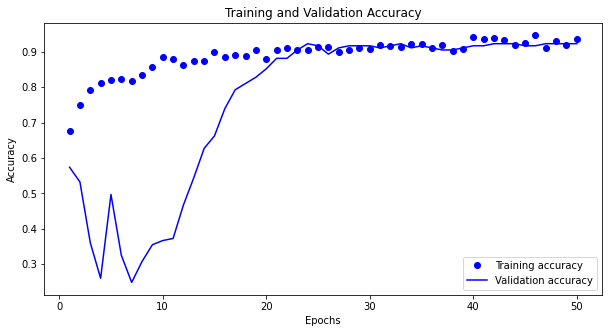

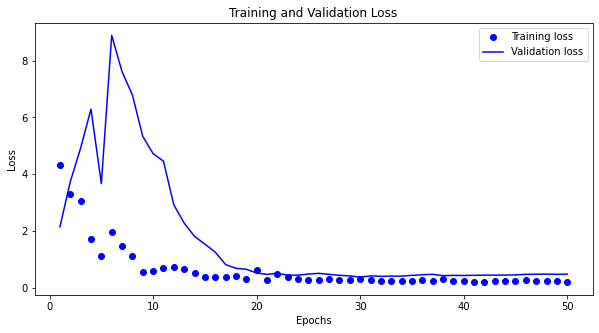

In [87]:
# Plotting history metrics
plot_history_metrics(history)

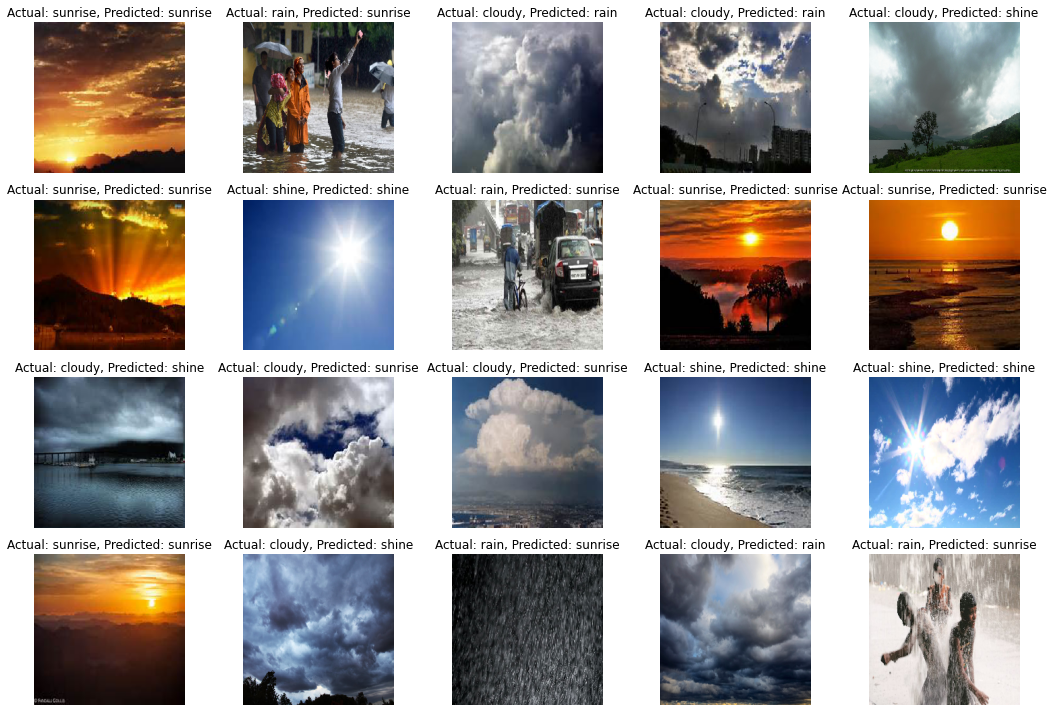

In [88]:
# Generating predictions for 20 samples and visualizing

generate_and_visualize_predictions(model5, test_gen, label_map, target_width, target_height)

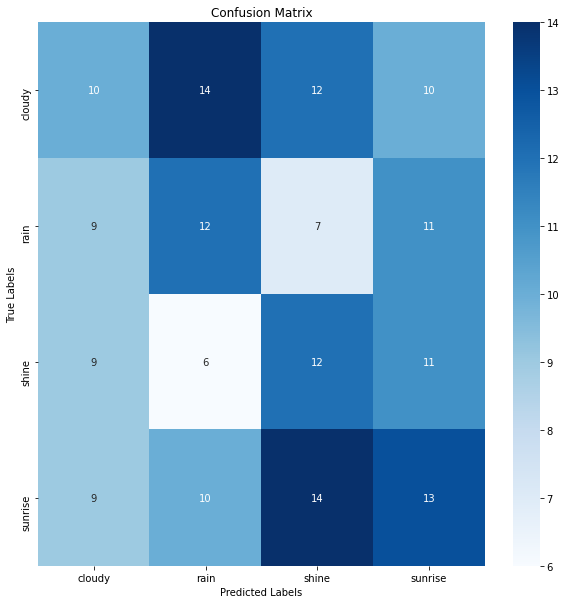

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.22      0.24        46
           1       0.29      0.31      0.30        39
           2       0.27      0.32      0.29        38
           3       0.29      0.28      0.29        46

    accuracy                           0.28       169
   macro avg       0.28      0.28      0.28       169
weighted avg       0.28      0.28      0.28       169



In [90]:
# Generating confusion matrix and classification report and visualizing

generate_confusion_matrix_and_report(model5, test_gen, weather_classes)

In [ ]:
# Loading EfficientNetB0 pre-trained model without top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(target_width, target_height, 3))

# Adding new top layers for 4 weather classes
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(weather_classes), activation='softmax')(x)

# Creating a new model with modified top layers
model6 = Model(inputs=base_model.input, outputs=predictions)

# Freezing EfficientNetB0 layers
for layer in base_model.layers:
    layer.trainable = False

# Compiling the model
model6.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model6.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=10,
    validation_data=valid_gen,
    validation_steps=valid_gen.samples // batch_size
)


In [ ]:
# Evaluating the model on the test data and displaying model summary

evaluate_and_display_summary(model6, test_gen)

In [ ]:
# Plotting history metrics
plot_history_metrics(history)

In [ ]:
# Generating predictions for 20 samples and visualizing

generate_and_visualize_predictions(model6, test_gen, label_map, target_width, target_height)

In [ ]:
# Generating confusion matrix and classification report and visualizing

generate_confusion_matrix_and_report(model6, test_gen, weather_classes)

In [ ]:
# Saving the best model
# model.save('`Weather_Recognition_Model.h5`')

## 2.5) Conclusion

## 2.6) Recommendation